In [183]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
import scipy.stats as st

In [115]:
mouse_base = "Resources/Mouse_metadata.csv"
mouse_data = pd.read_csv(mouse_base)
study_base = "Resources/Study_results.csv"
study_data = pd.read_csv(study_base)

In [116]:
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [117]:
study_data   

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [118]:
combined_data = pd.merge(mouse_data,study_data, on = "Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [119]:
combined_data['Drug Regimen'].nunique()

10

In [120]:
combined_data['Tumor Volume (mm3)'] = combined_data['Tumor Volume (mm3)'].apply(pd.to_numeric)
drug_mid = combined_data.groupby('Drug Regimen')

tumors = drug_mid['Tumor Volume (mm3)']

drug_mean = tumors.mean()
drug_median = tumors.median()
drug_var = tumors.var()
drug_std = tumors.std()
mice_count = drug_mid['Mouse ID'].count()

data_summ = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median, 'Variation': drug_var, 'Standard Deviation': drug_std, 'Mice Count': mice_count})
data_summ

,Mean,Median,Variation,Standard Deviation,Mice Count
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,178
Infubinol,52.884795,51.820584,43.128684,6.567243,178
Ketapril,55.235638,53.698743,68.553577,8.279709,188
Naftisol,54.331565,52.509285,66.173479,8.134708,186
Placebo,54.033581,52.288934,61.168083,7.821003,181
Propriva,52.322552,50.854632,42.351070,6.507770,161
Ramicane,40.216745,40.673236,23.486704,4.846308,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,181


([<matplotlib.axis.XTick at 0x1f25341c730>,
 [Text(0, 0, "['Capomulin']"),
  Text(1, 0, "['Ceftamin']"),
  Text(2, 0, "['Infubinol']"),
  Text(3, 0, "['Ketapril']"),
  Text(4, 0, "['Naftisol']"),
  Text(5, 0, "['Placebo']"),
  Text(6, 0, "['Propriva']"),
  Text(7, 0, "['Ramicane']"),
  Text(8, 0, "['Stelasyn']"),
  Text(9, 0, "['Zoniferol']")])

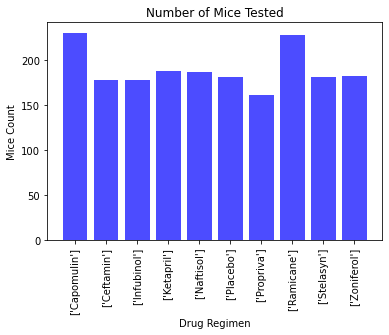

In [121]:
x_axis = np.arange(len(drug_mid['Drug Regimen']))

plt.bar(x_axis,mice_count,color = "b", alpha = 0.7, align = 'center')
plt.title("Number of Mice Tested")
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
tick_locs = [value for value in x_axis]
plt.xticks(x_axis, drug_mid['Drug Regimen'].unique(), rotation = 'vertical')

Text(0, 0.5, 'Mice Count')

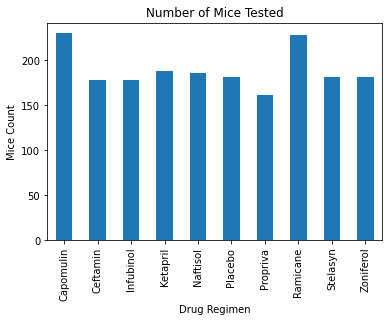

In [122]:
drug_bar = mice_count.plot(kind = 'bar', title = 'Number of Mice Tested')
drug_bar.set_ylabel('Mice Count')

In [123]:
gender_df = combined_data.groupby('Sex')
gender_num = gender_df['Drug Regimen'].count()
gender_fin = pd.DataFrame({'Gender Count': gender_num})
gender_fin

,Gender Count
Sex,
Female,935
Male,958


Text(0.5, 1.0, 'Gender Ditribution')

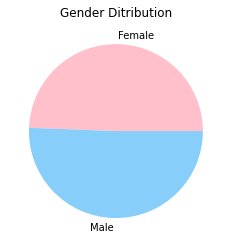

In [124]:
labels = ['Female','Male']
colors = ['pink','lightskyblue']
plt.pie(gender_fin['Gender Count'], labels = labels, colors = colors)
plt.title('Gender Ditribution')

<AxesSubplot:title={'center':'Gender Distribution'}, ylabel=' '>

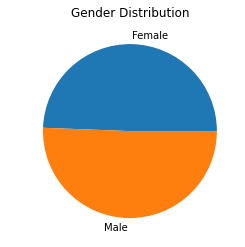

In [125]:
gender_pie = gender_num.plot(kind = 'pie', title = 'Gender Distribution')
gender_pie.set_ylabel(' ')
gender_pie

In [126]:
#drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#max_timepoint = pd.DataFrame(study_data.groupby('Mouse ID')['Timepoint'].max()).reset_index()
#combined_mouse = pd.merge(max_timepoint, mouse_data, on = 'Mouse ID')
#combined_mouse

In [127]:
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


<AxesSubplot:title={'center':'s185 Tumor Info'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

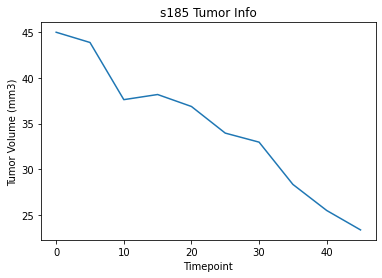

In [170]:
mouse_name = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']['Mouse ID'].iloc[0]
mouse_info = combined_data.loc[combined_data['Mouse ID'] == mouse_name][['Timepoint','Tumor Volume (mm3)']]
mouse_info.index = mouse_info['Timepoint']
mouse_plot = mouse_info['Tumor Volume (mm3)'].plot.line(title = f"{mouse_name} Tumor Info")
mouse_plot.set_ylabel('Tumor Volume (mm3)')
mouse_plot

Text(0, 0.5, 'Tumor Volume (mm3)')

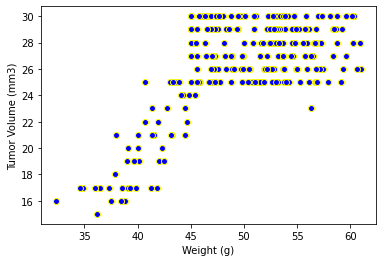

In [179]:
scatter_start = combined_data.groupby('Mouse ID')
tumor_avg = scatter_start['Weight (g)'].mean()
weight_avg = scatter_start['Tumor Volume (mm3)'].mean()
scatter_df = pd.DataFrame({'Weight': weight_avg,'Tumor Vol': tumor_avg})
scatter_df

plt.scatter(weight_avg,tumor_avg,marker = 'o', facecolors = 'blue', edgecolors = 'yellow')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

In [184]:
correlation = st.pearsonr(weight_avg,tumor_avg)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

The correlation between weight and tumor volume is 0.66
